### Question 1 

In [1]:
#importing the needed libraries 

import numpy as np 
import matplotlib.pyplot as plt
import cmath
from z_iteration import z_iteration

/tmp/ipykernel_2555350/542508834.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('q1_twocolours.pdf')
/tmp/ipykernel_2555350/542508834.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('q1_twocolours.pdf')
/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


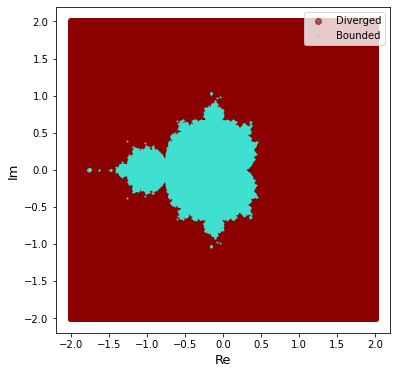

In [2]:
#defining x and y coordinates of the complex plane with -2<x<2 and -2<y<2
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)

#defines empty lists for the bounded and diverged points
x_bded=[]
y_bded=[]
x_div=[]
y_div=[]

#defines an empty list for the iteration numbers at which points diverge 
num_it = []

#goes through each point to determine if it is bounded 
for b in x:
    for c in y:
        complex_n = complex(b, c)
        z_int = z_iteration(complex_n, 50)[0]
        
        #a point is known to be bounded if its absolute value of z is less than or equal to 2, otherwise it diverges
        if abs(z_int[-1]) <= 2:
            x_bded.append(b)
            y_bded.append(c)
                
        else:
            x_div.append(b)
            y_div.append(c)
            num_it.append(z_iteration(complex_n, 50)[1]) 

#plots and labels an image in which the points c that diverge are given one color(turqoise)
#and those that stay bounded are given another colour(dark red)
fig = plt.figure(figsize=(6,6))              
plt.scatter(x_div,y_div, alpha=0.6, label = 'Diverged', color = "darkred")    
plt.scatter(x_bded,y_bded, label='Bounded', color = "turquoise", s=1)

plt.xlabel('Re',fontsize = '13')
plt.ylabel('Im',fontsize = '13')
plt.legend()

plt.savefig('q1_twocolours.pdf')
plt.show()

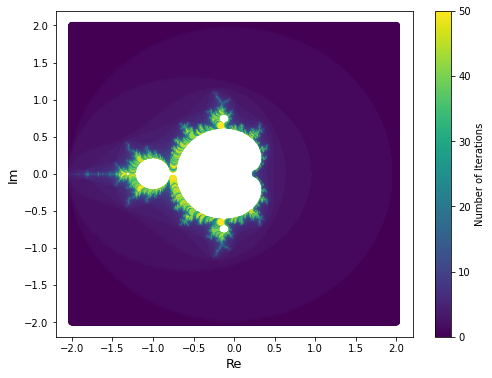

In [3]:
#plots and labels an image where the points are coloured by a colourscale that 
#indicates the iteration number at which the given point diverged. The bounded points never diverge so they do not 
#have a colour associated with them and appear as a white space.

plt.figure(figsize = (8,6))
plt.scatter(x_div, y_div, c=num_it)
plt.colorbar(label="Number of Iterations")

plt.xlabel('Re', fontsize = '13')
plt.ylabel('Im', fontsize = '13')

plt.savefig("q1_colorscale.pdf")
plt.show()  

### Question 2

In [4]:
def Lorenz(t,W,sigma,rho,beta):
    """Calculates Lorenz's equations when given values for x,y,z and the necessary dimensionless parameters, 
    sigma,rho,and beta.
    
    Parameters:
    ----------
    t: number (float or integer)
       The time. 
       
    W: list of numbers(float or integer)
       A list of three numbers, W = [x,y,z] which will be used as the x, y and z values in 
       the differential equations.
    
    sigma: number (float or integer)
           The Prandtl number which is the ratio of the kinematic viscosity to the thermal diffusivity.

    rho: number (float or integer)
         The Rayleigh number which depends on the vertical temperature difference between the top and 
         bottom of the atmosphere.
    
    beta: number (float or integer)
          A dimensionless length scale.
    

    Returns:
    --------
    [dx,dy,dz]: list of numbers(float or integer)
                The values of the three differential equations: dx = -sigma*(x-y), dy = rho*x - y - x*z, 
                dz = -beta*z + x*y.
    
    """
    x,y,z = W
    dx = -sigma*(x-y)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    
    return [dx,dy,dz]


In [5]:
#imports the ode solver from the needed library 
from scipy.integrate import solve_ivp

#setting initial conditions 
W0 = [0.,1.,0.]
t0 = 0.

#defining parameter values 
sigma = 10.
rho = 28.
beta = 8./3.

#defining maximum time and iteration number 
tmax =  60
dt = 0.01
n = int(tmax/dt)

#making an array to store the results
times = [t0]
res = [W0]

#integrating the Lorenz equations
soln = solve_ivp(Lorenz, (0, tmax), W0, args=(sigma, rho, beta),
                 dense_output=True)

#iterpolating solution onto the time grid, t
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)
W = [x,y,z]

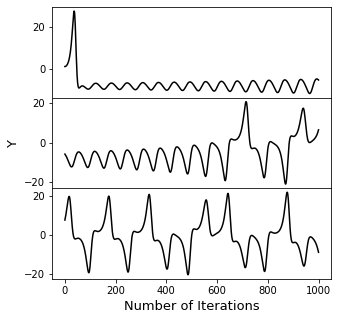

In [6]:
#plots and labels the numerical solution of Y for the first 1000 iterations (top), 
#second 1000 iterations(middle) and third 1000 iterations(bottom)

fig = plt.figure(figsize = (5,5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(y[0:1001], color = 'black')
axs[1].plot(y[1002:2003], color = 'black')
axs[2].plot(y[2004:3005], color = 'black')
axs[1].set_ylabel("Y", fontsize = "13")
plt.xlabel("Number of Iterations", fontsize = "13")
plt.savefig("q2_yiterations.pdf")
plt.show()

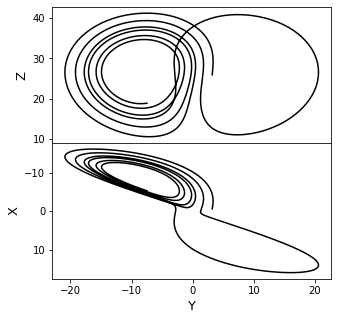

In [7]:
#gets solution output at closely spaced time intervals
t = np.linspace(14, 19, 1000)
x1, y1, z1 = soln.sol(t)

#plots and labels the numerical solutions to the equations, showing the projection on the YZ and XY plane 
#in phase space of the segment trajectory extending from iteration 1400 to 1900.

fig = plt.figure(figsize = (5,5))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots()

axs[0].plot(y1, z1, color = 'black')
axs[1].plot(y1, x1, color = 'black')

axs[0].set_ylabel("Z",fontsize = "13")
axs[1].set_ylabel("X",fontsize = "13")

axs[1].invert_yaxis()
plt.xlabel("Y", fontsize = "13")
plt.savefig("q2_projections.pdf")
plt.show()

In [8]:
#defining new W0 value
new = [0.,0.00000001,0.]
W0_new = []
for (num1, num2) in zip(W0, new):
    W0_new.append(num1+num2)
    
#integrating the Lorenz equations.
soln = solve_ivp(Lorenz, (0, tmax), W0_new, args=(sigma, rho, beta),
                 dense_output=True)

#interpolating solution onto the time grid, t
t_new = np.linspace(0, tmax, n)
x_new, y_new, z_new = soln.sol(t_new)
W_new = [x,y,z]


In [9]:
#calculates the distance between the new W and old W

distances = np.sqrt((x_new - x)**2 + (y_new - y)**2 + (z_new - z)**2 )

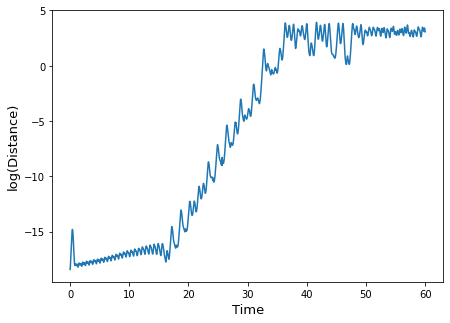

In [10]:
#plots the distances as a semilog plot (linear time, log distance)

fig = plt.figure(figsize = (7,5))
plt.plot(t_new, np.log(distances))
plt.xlabel("Time", fontsize = "13")
plt.ylabel("log(Distance)", fontsize = "13")
plt.savefig("q2_distances.pdf")
plt.show()